# 🛳️ Titanic Survival Prediction (Beginner ML Project)
This notebook is a complete walkthrough of solving the Titanic survival classification problem using machine learning.

**Objective**: Predict whether a passenger survived or not based on features like age, gender, class, etc.

_This is my first hands-on ML project, where I got my hands on EDA, feature engineering, and classification models._


In [53]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ml model 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## 📊 Exoploratory data analysis
Before building a model first we need  to explore the data to get an understanding of what we have and what we need to make to get the data prepared.
So we will check the 
* missing values
* correlation between the features
* survival rates across diff groups
* some distributions like age,fare

In [54]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
train_data.info()
print('--'*30)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  --

In [57]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Now we will check survival rates across diff features .we can check this with either by visualization or by grouping the feature.we will see both.
First lets check across sex and pclass by visualizing.


Text(0, 0.5, 'survivalrate')

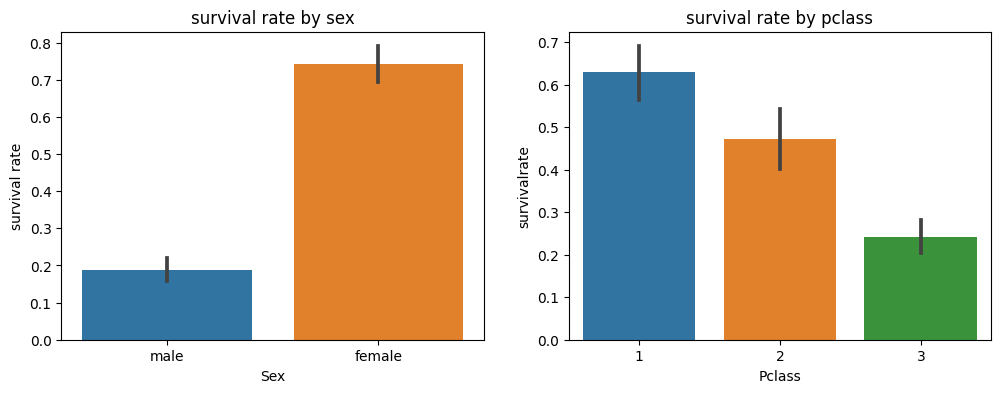

In [59]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

sns.barplot(data=train_data,x='Sex',y='Survived',ax=ax[0])
ax[0].set_title('survival rate by sex')
ax[0].set_ylabel('survival rate')

sns.barplot(data=train_data,x='Pclass',y='Survived',ax=ax[1])
ax[1].set_title('survival rate by pclass')
ax[1].set_ylabel('survivalrate')

Now lets check across Parch and sibsp by grouping.

In [60]:
train_data[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [61]:
train_data[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


We will see the distribution of age among those who survived and not .Later we will also check distribution of sex considering different features along with survived.

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_35/2865961871.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


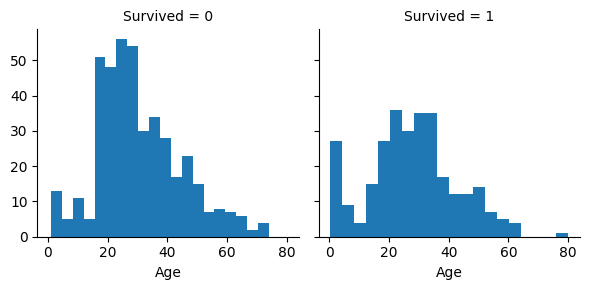

In [62]:
 g=sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.tight_layout()
# p=sns.histplot(x='Age',data=train_data,hue='Survived')

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histo

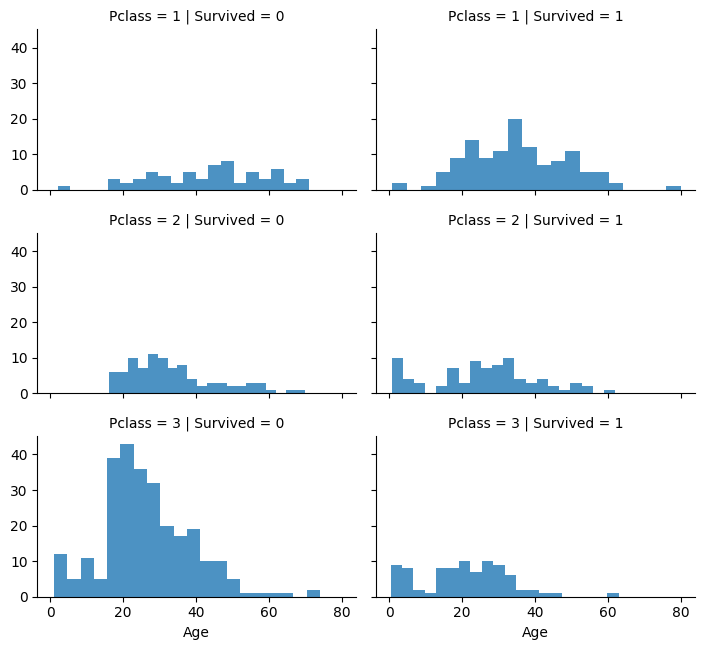

In [63]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.8, bins=20)
grid.add_legend()
plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


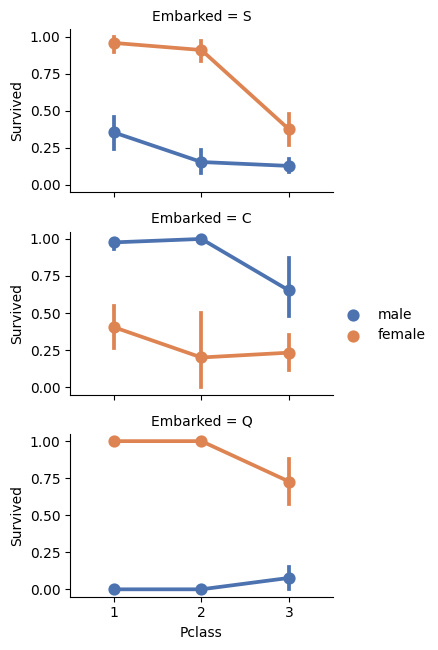

In [64]:
# grid = sns.FacetGrid(train_data, col='Embarked')
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


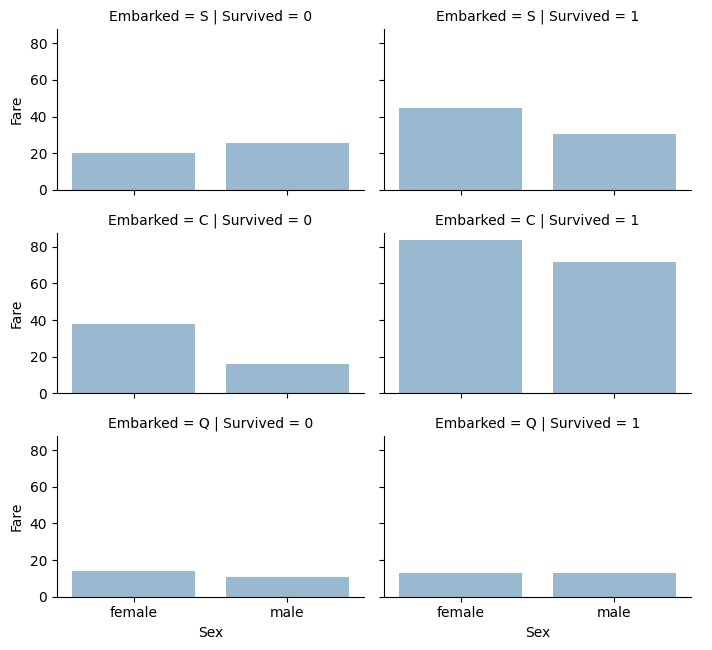

In [65]:
# grid = sns.FacetGrid(train_data, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None)
grid.add_legend()


From our observations we can say that by gender Females ,by port people from c port and by pclass 1 are most likely to survive.

## 🧱 Data wrangling and Feature engineering

Now lets clean the data and make it prepared for predictions

Cabin has more null values and a very little amount of data is known about cabin so we cant even replace it with some methods as it would make the model inaccurate.And coming to ticket feature ,this is of no use to predict a person's survival.so lets drop these features.

In [66]:
train_data=train_data.drop(['Cabin','Ticket'],axis=1)
test_data=test_data.drop(['Cabin','Ticket'],axis=1)
data=[train_data,test_data]
print(data[0].shape + data[1].shape)

(891, 10, 418, 9)


Now lets extract the titles of people from their name which could be used to predict their survival since the titles indicate people status.

In [67]:
for d in data:
    d['title']=d.Name.str.extract('([a-zA-Z]+)\.',expand=False)
pd.crosstab(train_data['title'],train_data['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [68]:
for dataset in data:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    
train_data[['title', 'Survived']].groupby(['title'], as_index=False).mean()

,title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [69]:
#can also use pd.get_dummies(train_data['title'])
for df in data:
    df['title']=LabelEncoder().fit_transform(df['title'])
    #just to start from 1 adding +1
    df['title']+=1
train_data[['title', 'Survived']].groupby(['title'], as_index=False).mean()

,title,Survived
0,1,0.575000
1,2,0.702703
2,3,0.156673
3,4,0.793651
4,5,0.347826


Now we can drop name columns from datasets and passendger id from training dataset since we need it while submission we can't remove it in test set

In [70]:

 train_data=train_data.drop(['Name','PassengerId'],axis=1)
 test_data=test_data.drop(['Name'],axis=1)
 data=[train_data,test_data]


In [71]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,892,3,0,34.5,0,0,7.8292,Q,3
1,893,3,1,47.0,1,0,7.0000,S,4
2,894,2,0,62.0,0,0,9.6875,Q,3
3,895,3,0,27.0,0,0,8.6625,S,3
4,896,3,1,22.0,1,1,12.2875,S,4


As we can see there some missing values in age and embarked columns
Most accurate way to fill these missing values is using the most corealated feature of that feature.
First lets look at Age feature ,its most corelated feature is title .

In [72]:
train_data.drop('Embarked',axis=1).corr()[['Age']]

,Age
Survived,-0.077221
Pclass,-0.369226
Sex,-0.093254
Age,1.000000
SibSp,-0.308247
Parch,-0.189119
Fare,0.096067
title,0.508856


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   title     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [74]:
for df in data:
    df['Age']=df.groupby('title')['Age'].transform(lambda x: x.fillna(x.median()))
    #if any of the titles have full null values, lets fill it with overall median value
    df['Age']=df['Age'].fillna(df['Age'].median())
print(f"Training data null value: {train_data['Age'].isnull().sum()}  Testing data null value: {test_data['Age'].isnull().sum()}")
    

Training data null value: 0  Testing data null value: 0


Let us create Age bands and determine survival basing them.

In [75]:
train_data['Age_band'], bin_edges = pd.cut(train_data['Age'], 5, retbins=True)
train_data[['Age_band', 'Survived']].groupby(['Age_band'], as_index=False).mean().sort_values(by='Age_band', ascending=True)

/tmp/ipykernel_35/2372535877.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[['Age_band', 'Survived']].groupby(['Age_band'], as_index=False).mean().sort_values(by='Age_band', ascending=True)


,Age_band,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.327345
2,"(32.252, 48.168]",0.439024
3,"(48.168, 64.084]",0.428571
4,"(64.084, 80.0]",0.090909


In [76]:
#increasing max band width  for test case
max_age = max(train_data['Age'].max(), test_data['Age'].max())
bin_edges[-1]=max_age+1
for df in data:
    df['Age']=pd.cut(df['Age'],bins=bin_edges,labels=[1,2,3,4,5])
# age with 204 and 354 values is getting null value for some reason so manually setting them to 5th categoor
test_data.loc[test_data['Age'].isnull(), 'Age'] = 5


In [77]:
train_data = train_data.drop(['Age_band'], axis=1)
data = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,0,2,1,0,7.2500,S,3
1,1,1,1,3,1,0,71.2833,C,4
2,1,3,1,2,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,4
4,0,3,0,3,0,0,8.0500,S,3


we will make a feature named family size with the help of parch and sibsp.so that we can drop parch and sibsp while keeping the family info

In [78]:
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [79]:
train_data.drop('Embarked',axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,0.543351
Age,-0.025714
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
title,-0.071174
FamilySize,0.016639


lets create a feature to tell if passenger is alone.


In [80]:
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [81]:
train_data.drop('Embarked',axis=1).corr()[['Survived']]

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,0.543351
Age,-0.025714
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
title,-0.071174
FamilySize,0.016639
IsAlone,-0.203367


In [82]:
train_data = train_data.drop([ 'FamilySize'], axis=1)
test_data = test_data.drop([ 'FamilySize'], axis=1)
data = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,IsAlone
0,0,3,0,2,1,0,7.2500,S,3,0
1,1,1,1,3,1,0,71.2833,C,4,0
2,1,3,1,2,0,0,7.9250,S,2,1
3,1,1,1,3,1,0,53.1000,S,4,0
4,0,3,0,3,0,0,8.0500,S,3,1


Now lets handle embarked feature which is categorical with some missing values.

In [83]:
freq_port = train_data.Embarked.dropna().mode()[0]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          418 non-null    category
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         417 non-null    float64 
 7   Embarked     418 non-null    int64   
 8   title        418 non-null    int64   
 9   IsAlone      418 non-null    int64   
dtypes: category(1), float64(1), int64(8)
memory usage: 30.1 KB


now lets look into fare attribute.As there is a single missing value in test data ,first lets get into it.

In [85]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].dropna().median())
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,IsAlone


we can now create a fare bands as we did for age.

In [86]:
train_data['FareBand'],fare_edges = pd.qcut(train_data['Fare'], 4,retbins=True)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/tmp/ipykernel_35/3804587383.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [87]:
max_fare=max(train_data['Fare'].max(), test_data['Fare'].max())
fare_edges[-1]=max_fare+1
fare_edges[0]=-0.5
for df in data:
    df['Fare'] = pd.cut(
        df['Fare'], 
        bins=fare_edges, 
        labels=[1, 2, 3, 4]
    )
    df['Fare'].astype(int)


In [88]:
train_data.drop(['FareBand'],axis=1,inplace=True)
train_data.select_dtypes('object').columns

Index([], dtype='object')

In [89]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,IsAlone
0,892,3,0,3,0,0,1,2,3,1
1,893,3,1,3,1,0,1,0,4,0
2,894,2,0,4,0,0,2,2,3,1
3,895,3,0,2,0,0,2,0,3,1
4,896,3,1,2,1,1,2,0,4,0


<h2>🤖 Model Building and evaluation</h2>

we are now ready to train and predict output for test data.First we need to understand what type of problem is this and its solution requirements.Here we need to predict whether a passenger survived or not which comes under the classification .we are going to use supervised machine learning models to train them on labels.
Among existing models we can narrow down our choice to a few like:

1. Logistic regression
2. Decision trees
3. Xgboost
4. random forest
5. k-nearest neighbors
6. Support vector macchine(svm)

In [90]:
x = train_data.drop("Survived", axis=1)
y = train_data["Survived"]
x_test  = test_data.drop("PassengerId", axis=1).copy()
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)


We'll now train models using Logistic Regression, SGDClassifier, and compare their performance.

In [91]:
# logistic regression

lr=LogisticRegression()
lr.fit(x_train,y_train)
logreg_score=lr.score(x_val,y_val)
logreg_score

0.8044692737430168

In [92]:
coeff=pd.DataFrame(train_data.columns.delete(0))
coeff.columns=['Feature']
coeff['correlation']=pd.Series(lr.coef_[0])
coeff.sort_values(by='correlation',ascending=False)

,Feature,correlation
1,Sex,2.522162
5,Fare,0.238153
6,Embarked,0.218762
7,title,-0.168609
4,Parch,-0.263450
2,Age,-0.360568
3,SibSp,-0.539140
8,IsAlone,-0.652995
0,Pclass,-0.782225


In [93]:
#sgdc
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_score = sgd.score(x_val,y_val) 
sgd_score

0.7318435754189944

In [94]:
#svm

svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_val)
svc_score=svc.score(x_val,y_val)
svc_score

0.8212290502793296

In [95]:
#linear svc
lin_svc=LinearSVC()
lin_svc.fit(x_train,y_train)
lin_svc_score=lin_svc.score(x_val,y_val)
lin_svc_score

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8044692737430168

In [96]:
#knn

knn=KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
knn_score=knn.score(x_val,y_val)
knn_score

0.7877094972067039

In [97]:
#decision tree

dec_tr=DecisionTreeClassifier()
dec_tr.fit(x_train,y_train)
dec_score=dec_tr.score(x_val,y_val)
dec_score

0.8268156424581006

In [98]:
#Random Forest

random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
randomforest_score=random_forest.score(x_val,y_val)
randomforest_score

0.8324022346368715

In [99]:
#xgboost

x_train = x_train.apply(lambda col: col.astype(int) if col.dtype.name == 'category' else col)
x_val = x_val.apply(lambda col: col.astype(int) if col.dtype.name == 'category' else col)

xgb=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train,y_train)
xgb_score=xgb.score(x_val,y_val)
xgb_score

0.8379888268156425

Since xgboost bydefault doesnt process categorical dtype (like age,fare) we converted them to int type 

In [100]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','XGBoost'],
    'Score': [svc_score, knn_score, logreg_score, 
              randomforest_score, 
              sgd_score, lin_svc_score, dec_score,xgb_score]})
models['Score']=round(models['Score']*100,2)
models.sort_values(by='Score', ascending=False)

,Model,Score
7,XGBoost,83.80
3,Random Forest,83.24
6,Decision Tree,82.68
0,Support Vector Machines,82.12
2,Logistic Regression,80.45
5,Linear SVC,80.45
1,KNN,78.77
4,Stochastic Gradient Decent,73.18


As we can see xgboost and random forest has outperformed others in predicting the output.since random forest also takes care of variance unlike xgboost, we will use it to predict the test data output.

In [101]:
rf=RandomForestClassifier(random_state=42)
param_grid={
    'n_estimators':[80,100,130,200],
    'max_depth':[4,6,8,None],
    'min_samples_split':[2,3,4],
    'min_samples_leaf': [2,3,4]
}

gs_rf=GridSearchCV(rf,param_grid,cv=3,scoring='recall')
gs_rf.fit(x_train,y_train)
pred_val=gs_rf.predict(x_val)

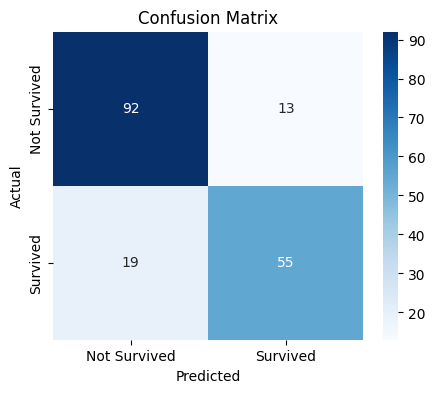

In [102]:
cm = confusion_matrix(y_val, pred_val)

# Plot using seaborn heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [103]:
print('accuracy of the model:',round(accuracy_score(y_val,pred_val)*100,2))
print('Precision of model:',precision_score(y_val,pred_val))
print('recall of the model:',recall_score(y_val,pred_val))

accuracy of the model: 82.12
Precision of model: 0.8088235294117647
recall of the model: 0.7432432432432432


In [104]:
y_pred=gs_rf.predict(x_test)
output = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred
    })
output.to_csv('submission.csv', index=False)
print('submitted!')

submitted!


## 🚀 Final Submission Result
The final model, built using Random Forest with feature engineering and preprocessing pipelines, achieved a Kaggle leaderboard score of 0.78468 on the Titanic - Machine Learning from Disaster competition.


## ✅ Summary
- This notebook was a complete walk-through of handling a classification problem from scratch.
- We explored the data, handled missing values, engineered features, and trained models.
- I learned alot of new things in feature engineering like extracting titles and making    use of it.Also using parch and sibsp to make familysize and derive isalone feature.
- This project helped me understand the workflow of a real ML task and secured a leaderboard score of 0.78468 which is a solid score placing among the wellperformed solutions.

> _Excited to try more projects next!_ 🚀